# KNN Yöntemiyle Şeker Hastalığı Tahmini

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

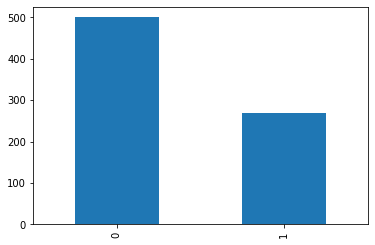

In [7]:
df["Outcome"].value_counts().plot.bar()

In [8]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2, stratify=y)

In [9]:
X_train.shape

(614, 8)

In [10]:
X_test.shape

(154, 8)

In [11]:
y_train.shape

(614,)

In [12]:
y_test.shape

(154,)

In [13]:
knn_model=KNeighborsClassifier(metric='euclidean').fit(X_train, y_train)

In [14]:
y_pred=knn_model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8896103896103896

In [16]:
knn = KNeighborsClassifier(metric='euclidean')

In [17]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [19]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [20]:
knn_cv_model.best_score_

0.8581438392384981

In [21]:
knn_cv_model.best_params_

{'n_neighbors': 12}

In [22]:
knn_tuned=KNeighborsClassifier(n_neighbors=12, metric='euclidean').fit(X_train, y_train)

In [23]:
y_pred=knn_tuned.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.8766233766233766

In [25]:
np.sqrt(mean_squared_error(y_train, knn_tuned.predict(X_train)))

0.3400517301133674

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred)) #test hatası

0.35125008665710444

In [27]:
yeni_veri = [[6],[180],[165],[25],[150.5],[265],[0.367],[42]]

In [28]:
pd.DataFrame(yeni_veri).T

,0,1,2,3,4,5,6,7
0,6.0,180.0,165.0,25.0,150.5,265.0,0.367,42.0


In [29]:
yeni_veri=pd.DataFrame(yeni_veri).T

In [30]:
knn_tuned.predict(yeni_veri)

array([1], dtype=int64)